In [29]:
import os
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [30]:
df=pd.read_csv('trend.csv',parse_dates=['login_date'])

In [31]:
df.head()

,login_date,sales
0,2014-01-01,120
1,2014-01-02,122
2,2014-01-03,132
3,2014-01-04,136
4,2014-01-05,145


In [32]:
df=df.groupby('login_date').sum()
series=df['sales'].resample('D').sum()

In [33]:
series.head()

login_date
2014-01-01    120
2014-01-02    122
2014-01-03    132
2014-01-04    136
2014-01-05    145
Freq: D, Name: sales, dtype: int64

<Axes: xlabel='login_date'>

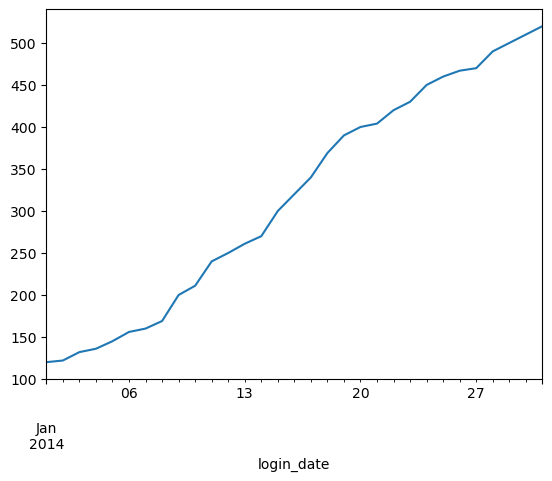

In [34]:
series.plot()

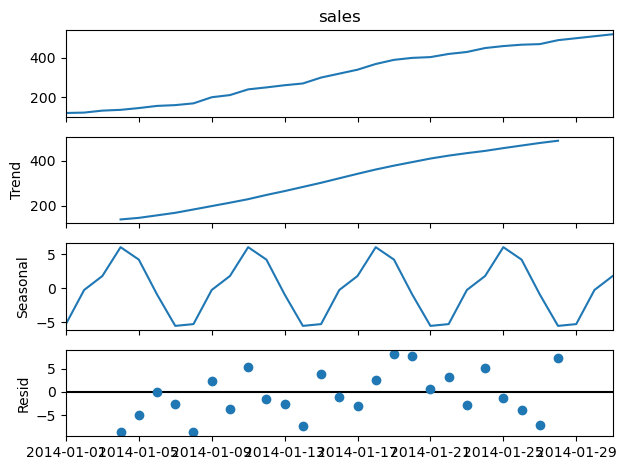

In [35]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(series,model='additive')
fig=decomposition.plot()
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
adftest=adfuller(series)

In [38]:
print('pvalue of adfuller test it: ',adftest[1])

pvalue of adfuller test it:  0.9639660116664333


In [39]:
len(series)

31

In [40]:
train=series[0:21]
test=series[21:]

In [41]:
test

login_date
2014-01-22    420
2014-01-23    430
2014-01-24    450
2014-01-25    460
2014-01-26    467
2014-01-27    470
2014-01-28    490
2014-01-29    500
2014-01-30    510
2014-01-31    520
Freq: D, Name: sales, dtype: int64

In [42]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 31) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...

SARIMAX: (0, 0, 1) x (0, 0, 1, 31)

SARIMAX: (0, 0, 1) x (0, 1, 0, 31)

SARIMAX: (0, 1, 0) x (0, 1, 1, 31)

SARIMAX: (0, 1, 0) x (1, 0, 0, 31)


In [43]:
warnings.filterwarnings("ignore") 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}31 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 31)31 - AIC:438.4110989721001

ARIMA(0, 0, 0)x(0, 0, 1, 31)31 - AIC:4.0

ARIMA(0, 0, 0)x(0, 1, 0, 31)31 - AIC:2.0

ARIMA(0, 0, 0)x(0, 1, 1, 31)31 - AIC:4.0

ARIMA(0, 0, 0)x(1, 0, 0, 31)31 - AIC:4.0

ARIMA(0, 0, 0)x(1, 0, 1, 31)31 - AIC:6.0

ARIMA(0, 0, 0)x(1, 1, 0, 31)31 - AIC:4.0

ARIMA(0, 0, 0)x(1, 1, 1, 31)31 - AIC:6.0

ARIMA(0, 0, 1)x(0, 0, 0, 31)31 - AIC:391.07984599069795

ARIMA(0, 0, 1)x(0, 0, 1, 31)31 - AIC:6.0

ARIMA(0, 0, 1)x(0, 1, 0, 31)31 - AIC:4.0

ARIMA(0, 0, 1)x(0, 1, 1, 31)31 - AIC:6.0

ARIMA(0, 0, 1)x(1, 0, 0, 31)31 - AIC:6.0

ARIMA(0, 0, 1)x(1, 0, 1, 31)31 - AIC:8.0

ARIMA(0, 0, 1)x(1, 1, 0, 31)31 - AIC:6.0

ARIMA(0, 0, 1)x(1, 1, 1, 31)31 - AIC:8.0

ARIMA(0, 1, 0)x(0, 0, 0, 31)31 - AIC:244.82595811333564

ARIMA(0, 1, 0)x(0, 0, 1, 31)31 - AIC:4.0

ARIMA(0, 1, 0)x(0, 1, 0, 31)31 - AIC:2.0

ARIMA(0, 1, 0)x(0, 1, 1, 31)31 - AIC:4.0

ARIMA(0, 1, 0)x(1, 0, 0, 31)31 - AIC:4.0

ARIMA(0, 1, 0)x(1, 0, 1, 31)31 - AIC:6.0

ARIMA(0, 1, 0)x(1, 1, 0, 31)31 -

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
model=ARIMA(train,order=(0,1,0)).fit()

In [46]:
len(train),(len(series)-1)

(21, 30)

In [47]:
pred=model.predict(start=21,end=30)

In [48]:
pred.head()

2014-01-22    404.0
2014-01-23    404.0
2014-01-24    404.0
2014-01-25    404.0
2014-01-26    404.0
Freq: D, Name: predicted_mean, dtype: float64

In [49]:
from sklearn.metrics import mean_squared_error


In [50]:
error=np.sqrt(mean_squared_error(test,pred))
error

74.70809862391091

In [51]:
test.mean(), np.sqrt(test.var())

(471.7, 33.300150149811635)

<Axes: xlabel='login_date'>

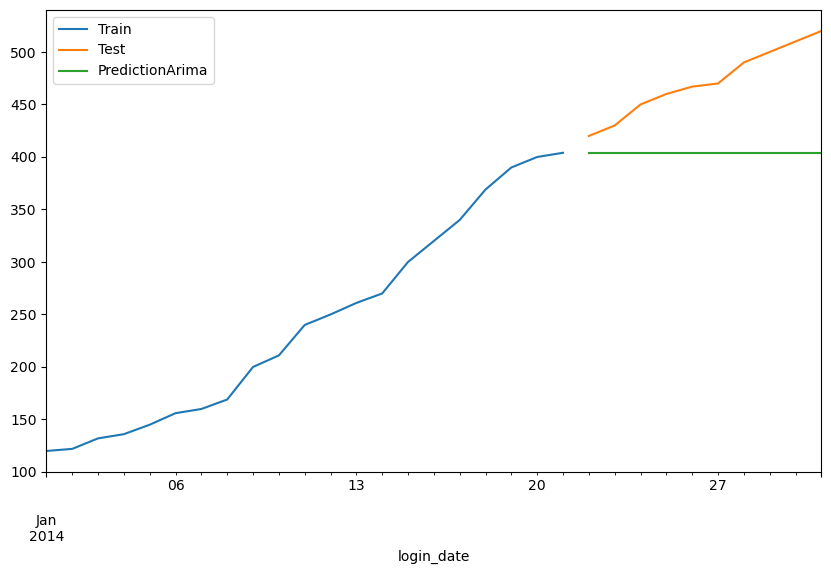

In [52]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='PredictionArima')

In [53]:
final_model=ARIMA(series, order=(0,1,0)).fit()

In [54]:
prediction=final_model.predict(len(series),len(series)+30)

<Axes: xlabel='login_date'>

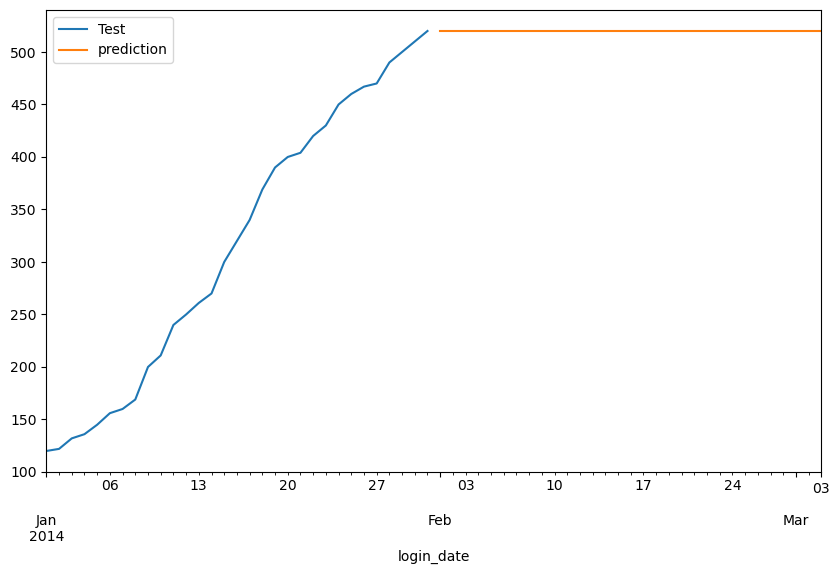

In [55]:
series.plot(legend=True, label='Test', figsize=(10,6))
prediction.plot(legend=True,label='prediction')